In [36]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df= pd.read_csv('Movie_regression.csv', header = 0)

In [38]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# Missing value imputation

In [40]:
df['Time_taken'].mean()

np.float64(157.3914979757085)

In [41]:
# Pandas 3.0 has this thing that will work as it takes json like object of atribute and replaces the na values
df.fillna({'Time_taken': df['Time_taken'].mean()}, inplace=True)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# Categorical to dummy variables

In [43]:
# drop n-1 will be faciliated by drop_first that will drop first of the extra vattribute generated
df = pd.get_dummies(df,columns = ['3D_available', 'Genre'], drop_first= True)
# Identify the dummy columns
dummy_columns = df.select_dtypes(include='bool').columns

# Convert boolean values to integers
df[dummy_columns] = df[dummy_columns].astype(int)


In [44]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


# division to test-train

In [45]:
# selecting all predictors except the variable we arepredicting for
x = df.loc[:, df.columns!='Collection']

In [46]:
type(x)

pandas.core.frame.DataFrame

In [47]:
y=df['Collection']

In [48]:
type(y)

pandas.core.series.Series

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

# training the regression tree

In [51]:
 from sklearn import tree
# defining tree with maximunm depth  for our model to fit and trian

regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [52]:
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [53]:
y_train_pred_dtree = regtree.predict(x_train)
y_test_pred_dtree = regtree.predict(x_test)

In [54]:
y_test_pred_dtree

array([ 46187.35632184, 100000.        ,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  23514.28571429,  23514.28571429,
        23514.28571429,  23514.28571429,  91860.86956522,  65183.33333333,
        46187.35632184,  65183.33333333,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        91860.86956522,  35137.77777778,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        23514.28571429, 100000.        ,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  35137.77777778,
        35137.77777778,  46187.35632184,  35137.77777778,  35137.77777778,
        46187.35632184,  

# calculating the performance with the predicted value

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
# mse is for comparing the error and effectiveness across all different models so we cnc ignore hthis
mean_squared_error(y_test, y_test_pred_dtree)

np.float64(117077216.27161306)

In [57]:
r2_score(y_train, y_train_pred_dtree)

0.8364651040556869

In [58]:
# the test value we are mroe interested on 
r2_score(y_test, y_test_pred_dtree)

0.636321038122745

In [59]:
# creating dot file for plotting the regreession tree for viaualizing the filtering criteria for our tree
dot_data = tree.export_graphviz(regtree, out_file=None)

In [60]:
# library to display the tree visualization
from IPython.display import Image

In [61]:
# we havbe to install this package to use it i first use pip install pydotplus in command procmpt
import pydotplus

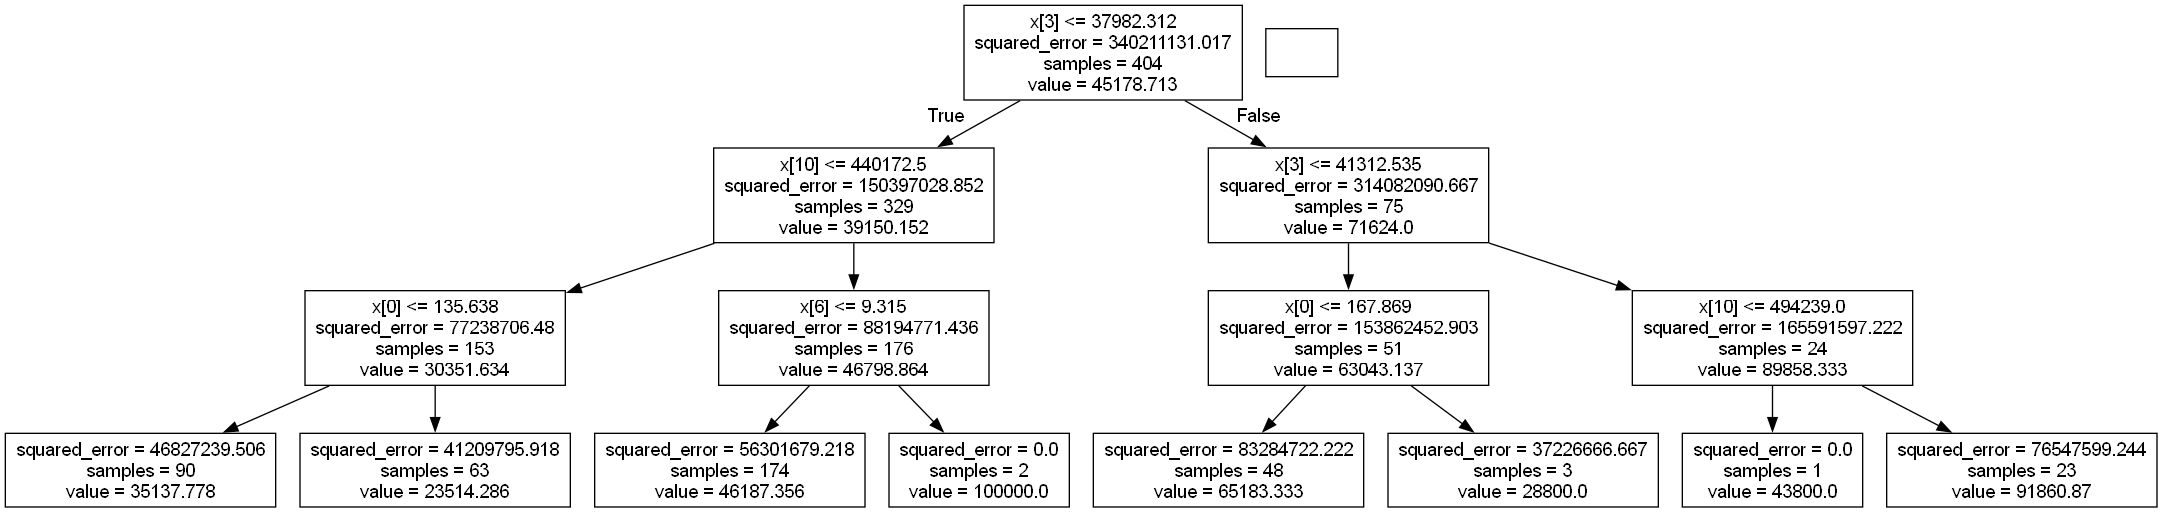

In [62]:
# cinally creating and displaying 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
# a decision tee with mazimum height o0f 3 nodes

# should download graphviz from https://graphviz.org/download/
# then add its bin path to the enviromentn variable then restart the sygtem 

# type 1 pruning in decision tree
## maximum depth as a constraint parameter to make it limited to 3 as max depth

In [63]:
regtree1 = tree.DecisionTreeRegressor(max_depth=3)

In [64]:
regtree1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

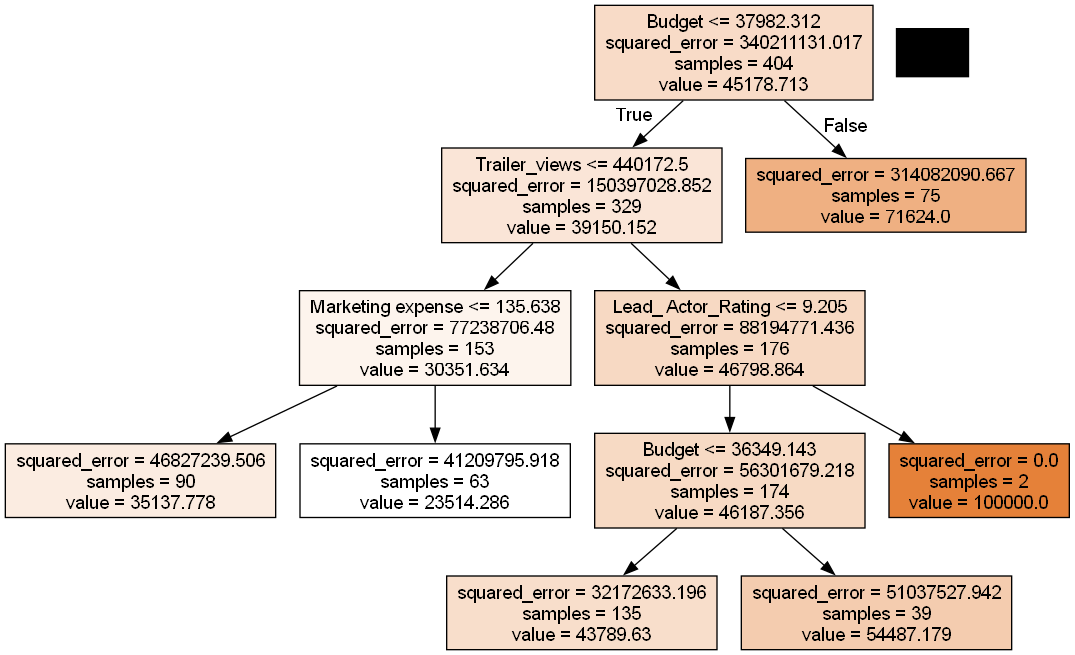

In [79]:
# creating dot data with tree format taking regtree with given constraint in previous shell pasing training columns
dot_data = tree.export_graphviz(regtree1, out_file=None, feature_names=x_train.columns, filled=True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())


# type 2  pruning as giving minimum sample for each category 
## we can tweak the sample sizes to rebulild and customize our decision trees for accuracy and feasibility

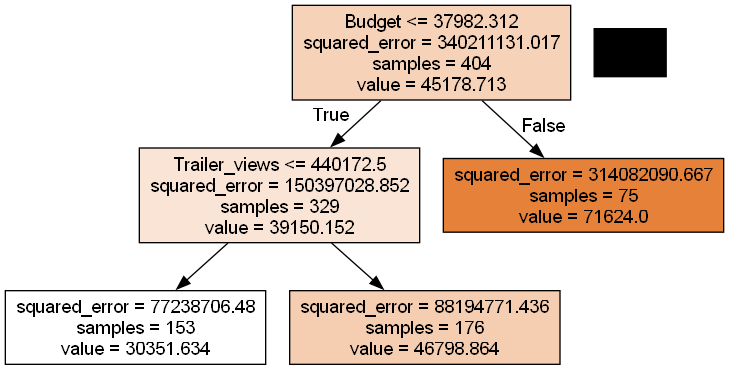

In [85]:
regtree1 = tree.DecisionTreeRegressor(min_samples_split=240)
regtree1.fit(x_train,y_train)
# creating dot data with tree format taking regtree with given constraint in previous shell pasing training columns
dot_data = tree.export_graphviz(regtree1, out_file=None, feature_names=x_train.columns, filled=True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())


# Type 3 pruning in decision tree with minimum number of leaf node with the minimum samples

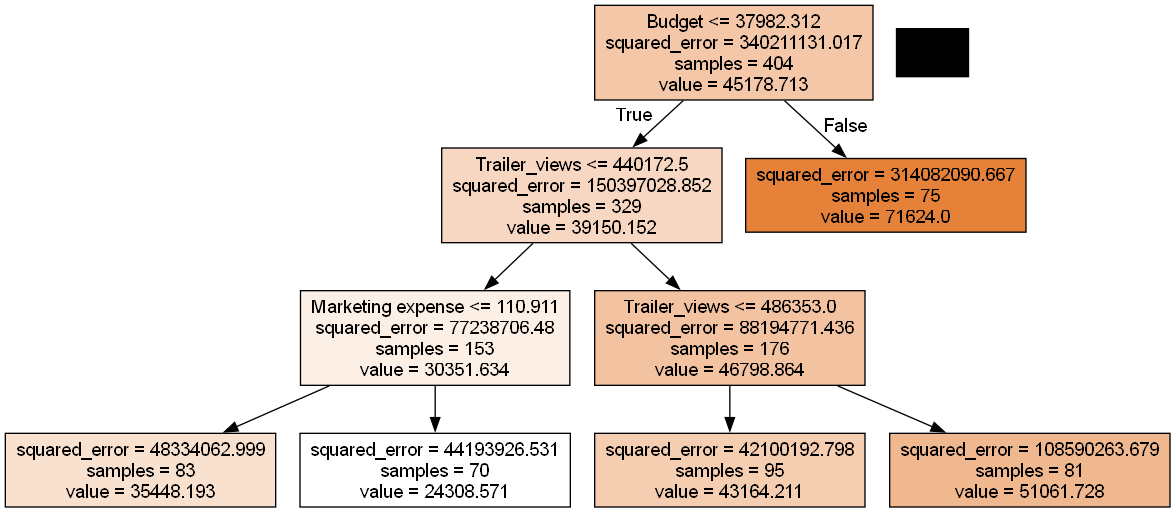

In [88]:
regtree1 = tree.DecisionTreeRegressor(min_samples_leaf=69)
regtree1.fit(x_train,y_train)
# creating dot data with tree format taking regtree with given constraint in previous shell pasing training columns
dot_data = tree.export_graphviz(regtree1, out_file=None, feature_names=x_train.columns, filled=True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())


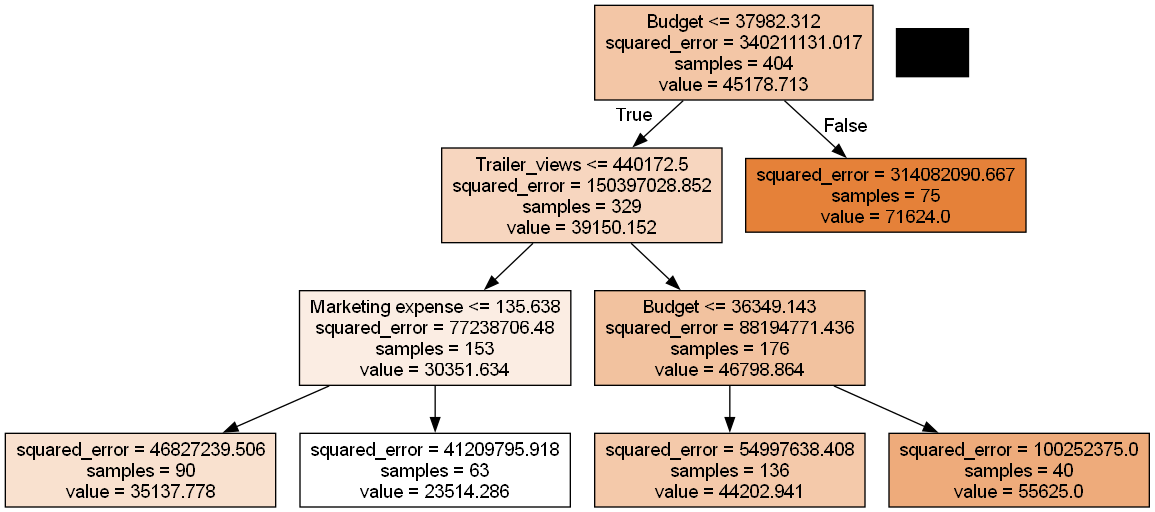

In [95]:
# leaf sample with maximum depth included as multi parameter

regtree1 = tree.DecisionTreeRegressor(min_samples_leaf=40, max_depth=3)
regtree1.fit(x_train,y_train)
# creating dot data with tree format taking regtree with given constraint in previous shell pasing training columns
dot_data = tree.export_graphviz(regtree1, out_file=None, feature_names=x_train.columns, filled=True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())
